In [1]:

from array import array
import math
import numpy as np



In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

def generator_function_root(x,par):
    return par[0]+par[1]*x[0]+par[2]*x[0]*x[0]+par[3]*x[0]*x[0]*x[0]

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x+paramlist[3]*x*x*x

par = array('d')
par.append(1.80)
par.append(-4.05)
par.append(0.40)
par.append(1.0000)

In [3]:

m = 3 #Set the order of the polynomial
n = 15 #Set the number of data points
walk = array('d')
walk = [-1,1,-.5,.5,0,-1,1,-.5,.5,0,-1,1,-.5,.5,0]
sigma = array('d')
sigma = [1,1,1,2,2,2,1,1,1,3,3,3,1,1,1]

In [4]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

In [5]:
for i in range(0,n):
    x.append(-4.0+8.0*i/n)
    y.append(generator_function(x[i],par)+0.5*walk[i])
    ex.append(0.0)
    ey.append(sigma[i])

In [6]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [7]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("Cofactor matrix:")
print (a)
print ("Constant matrix:")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("Inverse matrix")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
print (coeff)
        

Cofactor matrix:
[[ 1.00833333e+01 -3.35555556e+00  6.71980247e+01 -5.53197037e+01]
 [-3.35555556e+00  6.71980247e+01 -5.53197037e+01  7.40389785e+02]
 [ 6.71980247e+01 -5.53197037e+01  7.40389785e+02 -9.68304626e+02]
 [-5.53197037e+01  7.40389785e+02 -9.68304626e+02  9.09794484e+03]]
Constant matrix:
[[ 3.48700617e+00]
 [ 4.40982867e+02]
 [-3.30025986e+02]
 [ 5.63221737e+03]]
Inverse matrix
[[ 0.27431292  0.05019039 -0.02823758 -0.0054219 ]
 [ 0.05019039  0.17365438 -0.01122607 -0.0150216 ]
 [-0.02823758 -0.01122607  0.00469904  0.001242  ]
 [-0.0054219  -0.0150216   0.001242    0.00143159]]
Diagonal Check:
[[ 1.00000000e+00  4.12100377e-16 -1.54404997e-16 -1.99010346e-17]
 [-1.23625986e-15  1.00000000e+00  1.81464793e-16  2.68557373e-16]
 [ 1.24460858e-15  5.01304535e-16  1.00000000e+00  4.05384769e-17]
 [-6.62107437e-15 -2.41144358e-14  3.07108591e-16  1.00000000e+00]]
Coefficients:
[[ 1.87146382]
 [-4.14638851]
 [ 0.39545786]
 [ 1.00996585]]


In [8]:
yfit = 0
error_sum = 0
for j in range(0,n):
    for k in range(0,m+1):
        yfit = yfit + coeff[k]*math.pow(x[j],k)
    print ("i = %d  y = %f  yfit = %f" % (j,y[j],yfit))
    error_sum = error_sum + math.pow(((yfit-y[j])/ey[j]),2)
    yfit = 0
    
chi2 = error_sum/(n-m)
print ("chi2/dof = %f / %f" % (error_sum,(n-m-1)))

i = 0  y = -40.100000  yfit = -39.853471
i = 1  y = -20.514519  yfit = -21.078688
i = 2  y = -8.367926  yfit = -8.054340
i = 3  y = 0.250000  yfit = 0.138866
i = 4  y = 4.249481  yfit = 4.420223
i = 5  y = 5.040741  yfit = 5.709025
i = 6  y = 5.284000  yfit = 4.924565
i = 7  y = 2.639481  yfit = 2.986137
i = 8  y = 1.017407  yfit = 0.813034
i = 9  y = -0.672000  yfit = -0.675451
i = 10  y = -1.018519  yfit = -0.560025
i = 11  y = 2.638074  yfit = 2.078607
i = 12  y = 7.958000  yfit = 8.159737
i = 13  y = 18.851481  yfit = 18.602658
i = 14  y = 34.228741  yfit = 34.326665
chi2/dof = 1.060895 / 11.000000


In [9]:
print ("Coefficients with Errors:")
for k in range(0,m+1):
    print("p%d = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))

Coefficients with Errors:
p0 = 1.871464 +/- 0.523749
p1 = -4.146389 +/- 0.416719
p2 = 0.395458 +/- 0.068550
p3 = 1.009966 +/- 0.037836


[ 1.87146382 -4.14638852  0.39545786  1.00996585] [[ 0.27431292  0.05019039 -0.02823758 -0.0054219 ]
 [ 0.05019039  0.17365438 -0.01122607 -0.0150216 ]
 [-0.02823758 -0.01122607  0.00469904  0.001242  ]
 [-0.0054219  -0.0150216   0.001242    0.00143159]]
Coefficients (from curve_fit)
[ 1.87146382 -4.14638852  0.39545786  1.00996585]
Covariance Matrix (from curve_fit)
[[ 0.27431292  0.05019039 -0.02823758 -0.0054219 ]
 [ 0.05019039  0.17365438 -0.01122607 -0.0150216 ]
 [-0.02823758 -0.01122607  0.00469904  0.001242  ]
 [-0.0054219  -0.0150216   0.001242    0.00143159]]
Chi^2 / dof = 1.061E+00 / 11
Fit Parameter 0: 1.871E+00 +/- 5.237E-01
0 1 2.300E-01
0 2 -7.865E-01
0 3 -2.736E-01
Fit Parameter 1: -4.146E+00 +/- 4.167E-01
1 2 -3.930E-01
1 3 -9.527E-01
Fit Parameter 2: 3.955E-01 +/- 6.855E-02
2 3 4.789E-01
Fit Parameter 3: 1.010E+00 +/- 3.784E-02


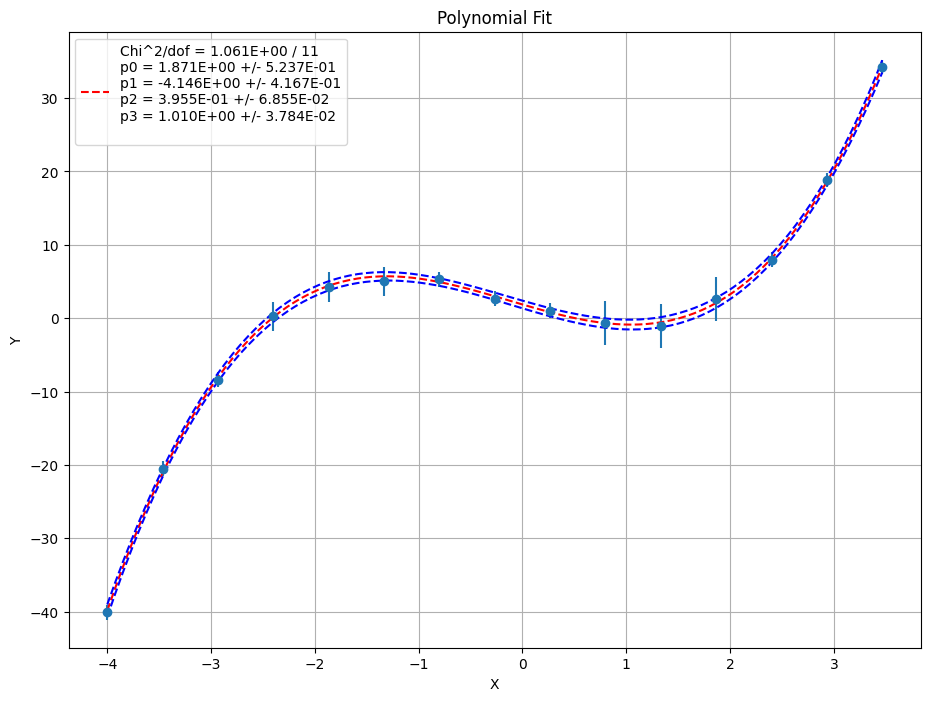

In [10]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.array(x)
y = np.array(y)
ex = np.array(ex)
ey = np.array(ey)


fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.set_title("Polynomial Fit")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_yscale("linear")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')

init_vals = [0.0 for x in range(0,m_params)]
#popt, pcov = curve_fit(fitfunction,x,y,sigma=ey,p0=init_vals)
popt, pcov = curve_fit(fitfunction,x,y,sigma=ey,p0=init_vals,absolute_sigma=True)

print (popt,pcov)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

yfit = []
chi2=0
for i in range (0,n):
    yfit.append(fitfunction(x[i],*popt))
    #chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(sigma[i]*sigma[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,n-len(init_vals)))

param = []
rhom = []
param.append(float(chi2))
param.append(n-len(init_vals))
for ii in range(0,len(init_vals)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
    for jj in range(0,len(init_vals)):
        rhom.append(float(pcov[ii][jj])/pow(float(pcov[ii][ii]*pcov[jj][jj]),0.5))
        if jj > ii:
            print("%d %d %.3E" % (ii,jj,rhom[ii*len(init_vals)+jj]))

mylabel = "Chi^2/dof = %.3E / %d\n"
for i in range(0,len(init_vals)):
    code = "p" + str(i)
    mylabel = mylabel + code + " = %.3E +/- %.3E\n"

ax1.plot(xi, fitfunction(xi, *popt), 'r--', label = mylabel % tuple(param))
ax1.plot(xi,lower,'b--')
ax1.plot(xi,upper,'b--')

leg = ax1.legend()
plt.show()